<a href="https://colab.research.google.com/github/benamaranermine/Gaia/blob/main/test_pretrainedmodels(gaia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

file_path = '/content/drive/MyDrive/CasosFIV_Gaia_reduced.xlsx'
data = pd.read_excel(file_path)


In [4]:
data

,Live birth occurrence,Egg source,Patient age at treatment,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age
0,1,1,32,0,0,0,0,0,0,0,1,32.000000
1,1,1,35,0,0,1,0,0,3,1,1,44.000000
2,1,1,31,0,0,0,0,0,0,2,0,37.314607
3,1,0,35,0,1,1,0,1,1,0,1,38.000000
4,1,1,36,0,0,0,0,0,0,0,0,37.314607
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,41,0,0,1,0,0,3,0,1,40.000000
107,0,1,43,0,2,3,0,0,0,0,1,42.000000
108,0,0,44,0,3,3,0,0,0,0,1,37.314607
109,0,1,20,0,0,0,0,1,0,0,1,23.000000


Exploratory Data Analysis


As data scientists, we usually use the words EDA and Data Visualization interchangeably. However, EDA is an approach to data analysis that uses a variety of techniques, and one of them is Data Visualization (also called Graphical EDA).

Before Visualizing (Non-Graphical EDA)

In [4]:
data.shape

(111, 12)

In [5]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [1 0 2] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [32 35 31 36 29 39 34 27 33 30 38 44 43 40 41 45 51 50 46 42 28 37 23 26
 20] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 2 3 5 4] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [0 3 1 2 4] unique values

Total number of previous DI cycles has : [0 1 2 3 4] unique values

Sperm source has : [1 0] unique values

Partner age has : [32.         44.         37.31460674 38.         35.         36.
 30.         33.         37.         50.         42.         40.
 49.         43.         46.         34.         29.         31.
 59.         45.         41.    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Live birth occurrence                              111 non-null    int64  
 1   Egg source                                         111 non-null    int64  
 2   Patient age at treatment                           111 non-null    int64  
 3   Causes of infertility - tubal disease              111 non-null    int64  
 4   Total number of previous live births - IVF or DI   111 non-null    int64  
 5   Total number of previous pregnancies - IVF and DI  111 non-null    int64  
 6   Causes of infertility - endometriosis              111 non-null    int64  
 7   Causes of infertility - ovulatory disorder         111 non-null    int64  
 8   Total number of previous IVF cycles                111 non-null    int64  
 9   Total numb

In [7]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Live birth occurrence,111.0,0.441441,0.582856,0.0,0.0,0.000000,1.0,2.0
Egg source,111.0,0.783784,0.413530,0.0,1.0,1.000000,1.0,1.0
Patient age at treatment,111.0,35.369369,5.900582,20.0,30.0,35.000000,40.0,51.0
Causes of infertility - tubal disease,111.0,0.027027,0.162898,0.0,0.0,0.000000,0.0,1.0
Total number of previous live births - IVF or DI,111.0,0.324324,0.689692,0.0,0.0,0.000000,0.0,3.0
Total number of previous pregnancies - IVF and DI,111.0,0.585586,1.171390,0.0,0.0,0.000000,1.0,5.0
Causes of infertility - endometriosis,111.0,0.072072,0.259780,0.0,0.0,0.000000,0.0,1.0
Causes of infertility - ovulatory disorder,111.0,0.081081,0.274198,0.0,0.0,0.000000,0.0,1.0
Total number of previous IVF cycles,111.0,0.486486,0.882814,0.0,0.0,0.000000,1.0,4.0
Total number of previous DI cycles,111.0,0.378378,0.924948,0.0,0.0,0.000000,0.0,4.0


In [8]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

Graphical EDA

1-covert age ranges into categorical data


*  Patient age at treatment
*  Partner age



In [4]:
# Assuming you have already read the Excel file into a DataFrame called 'data'
# Replace 'data' with the actual variable name if different

# Custom function to map float values to categorical values based on age ranges
def map_age_range(age):
    if 18 <= age <= 34:
        return 0
    elif 35 <= age <= 37.5:
        return 1
    elif 38 <= age <= 39:
        return 2
    elif 40 <= age <= 42:
        return 3
    elif 43 <= age <= 44:
        return 4
    elif 45 <= age <= 50:
        return 5
    elif 50 <= age <= 60:
        return 6
    else:
        return None  # Handle any other cases as per your requirement

# Apply the custom mapping function to the 'Patient Age at Treatment' column
#data['Patient age at treatment'] = data['Patient age at treatment'].map(map_age_range)

# Verify the changes
#print(data['Patient age at treatment'])


In [5]:
#data=data.drop(['Partner age'], axis=1)


In [10]:
# Apply the custom mapping function to the 'Patient Age at Treatment' column
#data['Partner age'] = data['Partner age'].map(map_age_range).astype('Int64')

# Verify the changes
#print(data['Partner age'])


In [5]:
def convert_to_binary_classification(df):
    # Copy the original DataFrame
    data = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    data["Live birth occurrence"] = data["Live birth occurrence"].apply(lambda x: 1 if x >= 1 else 0)


    return data


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
data = convert_to_binary_classification(data)


# Display the result
print(data["Live birth occurrence"])





0      1
1      1
2      1
3      1
4      1
      ..
106    0
107    0
108    0
109    0
110    0
Name: Live birth occurrence, Length: 111, dtype: int64


2- Graphical EDA
Univariate analysis is simply the analysis of one variable at a time.


*   For categorical features, we want to know the number of unique classes and how frequently they occur.

*   For numerical features, we want to know the range of values present and how often these values (or groups of values) occur.




In [12]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

<Figure size 1000x800 with 0 Axes>

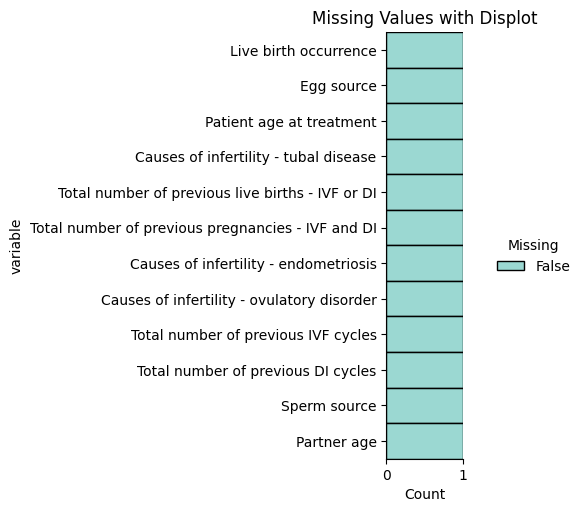

In [13]:
plt.figure(figsize=(10,8))
sns.displot(
    data=data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "GnBu"
)
plt.title('Missing Values with Displot')
plt.show()

In [7]:
data['Partner age'] = data['Partner age'].round().astype('Int64')


Now let's look at unique values in data columns

In [8]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [1 0] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [32 35 31 36 29 39 34 27 33 30 38 44 43 40 41 45 51 50 46 42 28 37 23 26
 20] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 2 3 5 4] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [0 3 1 2 4] unique values

Total number of previous DI cycles has : [0 1 2 3 4] unique values

Sperm source has : [1 0] unique values

Partner age has : <IntegerArray>
[32, 44, 37, 38, 35, 36, 30, 33, 50, 42, 40, 49, 43, 46, 34, 29, 31, 59, 45,
 41, 27, 53, 47, 39, 23]
Length: 25, dtype: Int64 unique values



# Count Plot

Target variable :Live birth occurrence

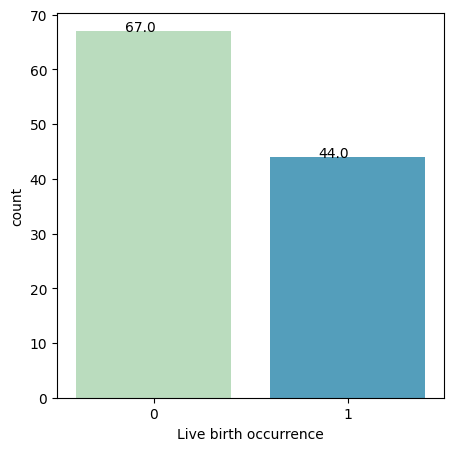

In [18]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Live birth occurrence'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [19]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(data['Live birth occurrence'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(data['Live birth occurrence'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 60.36 % of the dataset
Live birth occurrence 39.64 % of the dataset


we can see that we have unbalanced data

# corrolation

<Axes: >

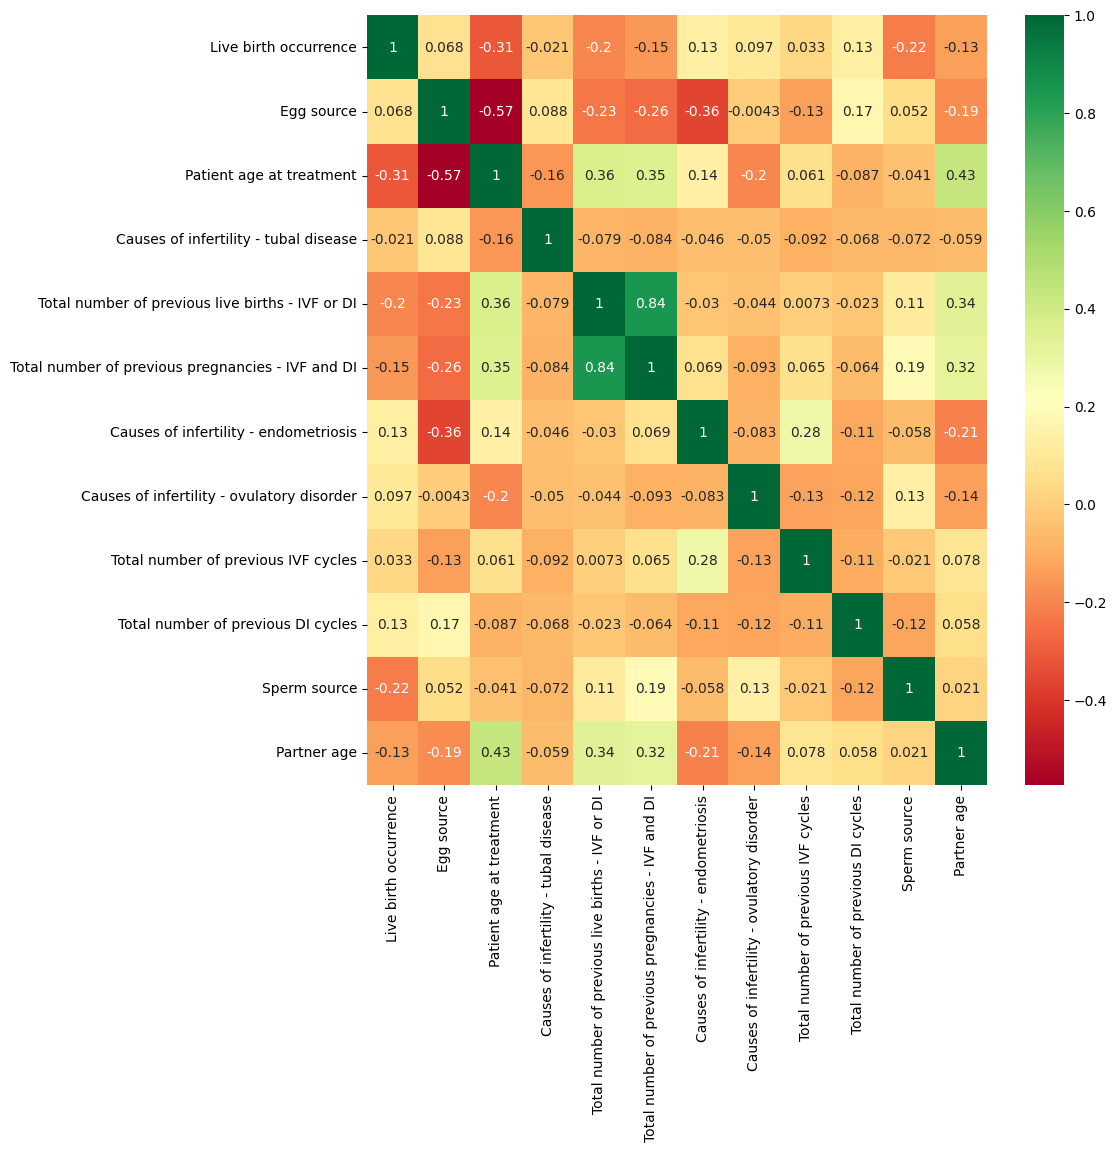

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),cbar=True,cmap='RdYlGn',annot=True)

In [21]:
# Most predominante variable
#Lets you know which variables have the most influence on Live birth occurrence
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
Num_feature = numeric_corr["Live birth occurrence"].sort_values(ascending=False).head(22).to_frame()
z = Num_feature.drop(["Live birth occurrence"])
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = z.style.background_gradient(cmap=cm)
style

,Live birth occurrence
Causes of infertility - endometriosis,0.130247
Total number of previous DI cycles,0.127043
Causes of infertility - ovulatory disorder,0.096652
Egg source,0.067714
Total number of previous IVF cycles,0.033418
Causes of infertility - tubal disease,-0.021487
Partner age,-0.132778
Total number of previous pregnancies - IVF and DI,-0.154243
Total number of previous live births - IVF or DI,-0.195028
Sperm source,-0.218498


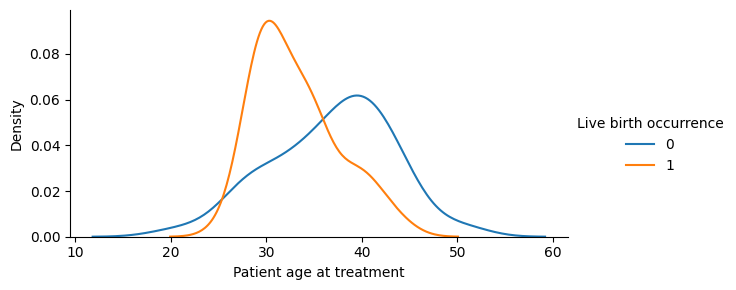

In [22]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Patient age at treatment')
grid.add_legend()

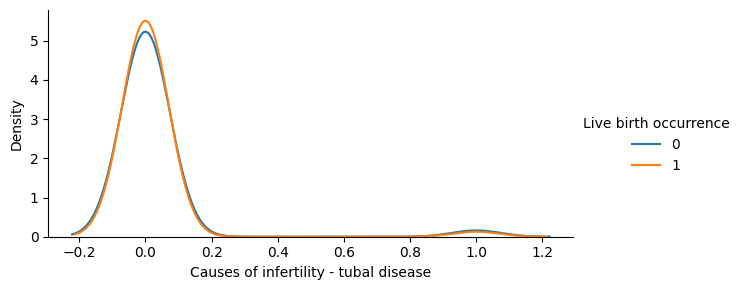

In [23]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Causes of infertility - tubal disease')
grid.add_legend()

#Data Scaling

In [9]:
X = data.drop(['Live birth occurrence'], axis=1)


In [10]:
Y = data['Live birth occurrence']


In [26]:
# Calculate the probability of live birth occurrence based on multiple predictors
grouped_data = data.groupby(['Patient age at treatment',
    'Egg source',
    'Causes of infertility - tubal disease',
    'Total number of previous live births - IVF or DI',
    'Total number of previous pregnancies - IVF and DI',
    'Causes of infertility - endometriosis',
    'Causes of infertility - ovulatory disorder',
    'Total number of previous IVF cycles',
    'Total number of previous DI cycles',
    'Sperm source',    'Partner age'
    ])
live_birth_probabilities = grouped_data['Live birth occurrence'].mean() * 100

# Convert the Series to DataFrame and reset the index
live_birth_probabilities_df = live_birth_probabilities.reset_index()
pd.set_option('display.max_rows', None)

# Display the DataFrame
live_birth_probabilities_df

,Patient age at treatment,Egg source,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age,Live birth occurrence
0,20,1,0,0,0,0,1,0,0,1,23,0.0
1,23,1,0,0,0,0,0,0,0,1,27,0.0
2,26,1,0,0,0,0,0,0,0,1,31,0.0
3,26,1,0,0,0,0,0,1,1,0,37,100.0
4,27,1,0,0,0,0,0,0,0,1,30,0.0
5,27,1,0,0,0,0,0,0,0,1,32,0.0
6,27,1,0,0,0,0,0,0,0,1,34,0.0
7,28,1,0,0,0,0,0,0,2,0,37,0.0
8,28,1,0,1,2,0,0,1,0,1,53,100.0
9,28,1,0,2,3,0,0,0,0,1,32,0.0


In [54]:
def ProbData(X,y,column):

    a = X[column]
    M = a[y==1]
    N = a[y==0]
    ind = X[column].unique()
    ind.sort()

    prob =[]
    for n in ind:
     #   print(n,column,len(M[M==n]),len(a[a==n]))
        prob.append(len(M[M==n])*100/len(a[a==n]))
    #print(prob)
    return ind, prob

def PredModel(X,column,prob):
    """comparamos con el promedio del output que sacamos de los modelos"""
    a = X[column].to_numpy()
    ind = X[column].unique()
    ind.sort()
    age_prob =[]
    for i in ind:
 #   mean.append(np.mean(prob_ADA[X_train["Patient age at treatment"] == i]))
        pos = np.where(a == i)
        prob = np.array(prob)
        age_prob.append(np.mean(prob[pos[0]])*100)
    return ind, age_prob

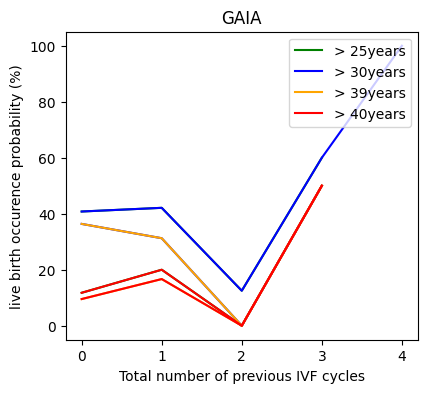

In [68]:
column = 'Total number of previous IVF cycles'
column0 = 'Patient age at treatment'
y_gaia = data['Live birth occurrence']
lista = ["Green", "Blue", "Orange", "Red"]
plt.figure(figsize=(10,4))

lim = [25,30,39,40]
plt.subplot(1,2,2)
for l,c in zip(lim,lista):

    plt.plot(ind,prob,color = c, label = '> ' + str(l) +'years')
    df2_gaia = data[data[column0] > l]
    ind,prob = ProbData(df2_gaia,y_gaia,column)
    plt.plot(ind[:4],prob[:4],color = c)



    #pl.plot(ind,pred, label = 'all ages RF')

plt.xlabel(column)
plt.ylabel('live birth occurence probability (%)')
plt.legend(loc = 'upper right');
plt.title('GAIA');

In [27]:
# List of columns (excluding 'Patient age at treatment' and 'Live birth occurrence')
probability_columns = [
    'Patient age at treatment',
    'Egg source',
    'Causes of infertility - tubal disease',
    'Total number of previous live births - IVF or DI',
    'Total number of previous pregnancies - IVF and DI',
    'Causes of infertility - endometriosis',
    'Causes of infertility - ovulatory disorder',
    'Total number of previous IVF cycles',
    'Total number of previous DI cycles',
    'Sperm source',
    'Partner age'
]

# Calculate the probability of live birth occurrence (success=1) for each column
for col in probability_columns:
    success_probabilities = data[data['Live birth occurrence'] == 1].groupby(col).size()
    total_occurrences = data.groupby(col).size()
    live_birth_occurrence_probability = (success_probabilities / total_occurrences) * 100

    print(f"Probability of live birth occurrence (success=1) based on {col}:")
    print(live_birth_occurrence_probability)
    print("\n")

Probability of live birth occurrence (success=1) based on Patient age at treatment:
Patient age at treatment
20           NaN
23           NaN
26     50.000000
27           NaN
28     33.333333
29     75.000000
30     85.714286
31     40.000000
32    100.000000
33           NaN
34     57.142857
35     83.333333
36     28.571429
37           NaN
38           NaN
39     50.000000
40           NaN
41     25.000000
42     25.000000
43           NaN
44     33.333333
45           NaN
46           NaN
50           NaN
51           NaN
dtype: float64


Probability of live birth occurrence (success=1) based on Egg source:
Egg source
0    33.333333
1    41.379310
dtype: float64


Probability of live birth occurrence (success=1) based on Causes of infertility - tubal disease:
Causes of infertility - tubal disease
0    39.814815
1    33.333333
dtype: float64


Probability of live birth occurrence (success=1) based on Total number of previous live births - IVF or DI:
Total number of previous live b

In [ ]:
#data = data.loc[(data['Patient age at treatment'] <= 2)]


In [ ]:
#data = data.loc[(data['Partner age'] <= 2)]


In [11]:
from sklearn.preprocessing import StandardScaler

# Select the columns from the DataFrame
cols = X.columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [51]:
# split the dataset
SEED=23
X_new_train, X_new_test, y_new_train, Y_new_test = train_test_split(X, Y, test_size=0.3,shuffle=True, stratify=Y, random_state=SEED)
#With random_state=0 , we get the same train and test sets across different executions


In [52]:
X_new_train.shape

(77, 11)

#Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_new_train,y_new_train)

RandomForestClassifier(n_estimators=25, random_state=12)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(Y_new_test, clf_rf.predict(X_new_test)))


              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.73      0.85      0.79        13

    accuracy                           0.82        34
   macro avg       0.81      0.83      0.82        34
weighted avg       0.83      0.82      0.83        34



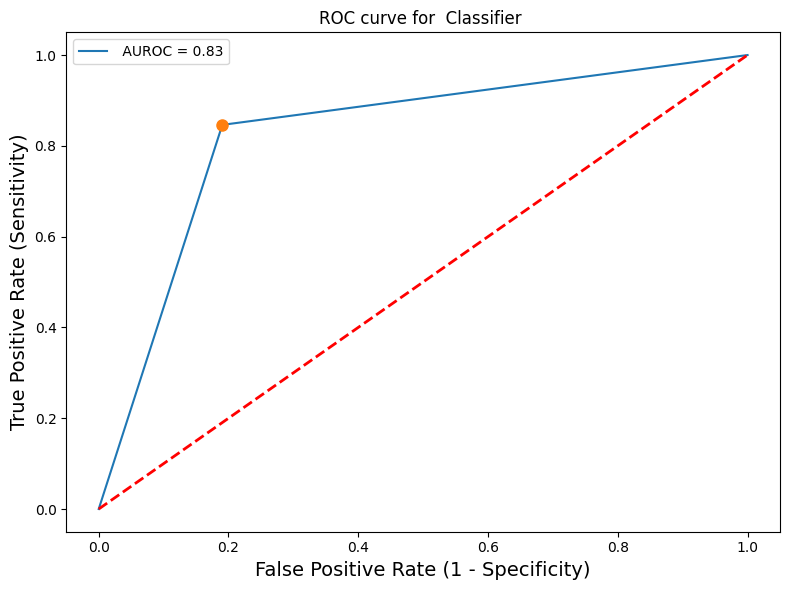

In [40]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_new_test, clf_rf.predict(X_new_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [62]:
#y_pred = clf_rf.predict(loaded_data)
#y_pred

In [41]:
live_birth_probabilities = clf_rf.predict_proba(X_new_test)[:, 1]
live_birth_probabilities

array([0.56      , 0.        , 0.56      , 0.32      , 0.64      ,
       0.44      , 0.04      , 0.48      , 0.16      , 0.        ,
       0.36      , 0.56      , 0.08      , 0.12      , 0.72      ,
       0.6       , 0.04      , 0.52      , 0.32      , 0.68      ,
       0.064     , 0.72      , 0.41      , 0.32      , 0.84      ,
       0.32      , 0.12      , 0.56      , 0.56      , 0.56      ,
       0.64      , 0.12      , 0.44      , 0.74666667])

#Pretrained Model

In [53]:
from keras.models import load_model

# Load the saved model
pretrained_model = load_model('/content/drive/MyDrive/my_model3.h5')


In [54]:
from keras.models import Model
from keras.layers import Input, Dense
import tensorflow as tf


In [55]:
num_classes = 2


In [57]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# Assuming you have a pretrained_model defined here
# pretrained_model = ... (pretrained model loaded here)

# Freeze the initial layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

new_input_shape = (11,)  # Change this to the desired input shape
new_input = Input(shape=new_input_shape)
new_layers = Dense(32, activation='relu', name='new_dense')(new_input)  # Change the number of units

# Connect the new input layer to a dense layer with the desired number of units
adapted_hidden_layer = Dense(64, activation='relu', name='adapted_dense')(new_layers)

# Connect the adapted hidden layer to the pretrained model's output layer
pretrained_output = pretrained_model.layers[-1](adapted_hidden_layer)

# Concatenate the pretrained output with the new layers
merged = concatenate([pretrained_output, new_layers])

# Add an additional Dense layer
new_layers_2 = Dense(128, activation='relu', name='new_dense_2')(merged)

# Add another Dense layer
new_layers_3 = Dense(64, activation='relu', name='new_dense_3')(new_layers_2)

# Add a final prediction layer
num_classes = 2  # Number of classes in your classification problem
output = Dense(num_classes, activation='softmax', name='final_output')(new_layers_3)

# Create the new model with the combined architecture
new_model = Model(inputs=[new_input], outputs=[output])


In [46]:
from keras.utils import to_categorical

# Assuming your original target data is y_new_train

num_classes = 2  # Number of classes in your classification problem
y_new_train_encoded = to_categorical(y_new_train, num_classes)
y_new_test_encoded = to_categorical(Y_new_test, num_classes)

new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
new_model.fit(X_new_train, y_new_train_encoded, epochs=10, batch_size=32, validation_data=(X_new_test, y_new_test_encoded))


Epoch 1/10
3/3 [==============================] - 1s 142ms/step - loss: 0.6855 - accuracy: 0.5844 - val_loss: 0.6788 - val_accuracy: 0.5882
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6500 - accuracy: 0.5974 - val_loss: 0.6681 - val_accuracy: 0.5882
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6279 - accuracy: 0.6494 - val_loss: 0.6613 - val_accuracy: 0.5882
Epoch 4/10
3/3 [==============================] - 0s 26ms/step - loss: 0.6083 - accuracy: 0.6883 - val_loss: 0.6561 - val_accuracy: 0.6176
Epoch 5/10
3/3 [==============================] - 0s 21ms/step - loss: 0.5899 - accuracy: 0.7273 - val_loss: 0.6534 - val_accuracy: 0.5588
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 0.5710 - accuracy: 0.7403 - val_loss: 0.6528 - val_accuracy: 0.5588
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.5568 - accuracy: 0.7792 - val_loss: 0.6544 - val_accuracy: 0.5588
Epoch 8/10
3/3 [==========

In [48]:
# Step 6: Evaluate the model
loss, accuracy = new_model.evaluate(X_new_test, y_new_test_encoded)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 0.6176
Validation loss: 0.6498570442199707
Validation accuracy: 0.6176470518112183


In [49]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = new_model.predict(X_new_test)
auc = roc_auc_score(y_new_test_encoded, y_pred)

print("AUC:", auc)

2/2 [==============================] - 0s 6ms/step
AUC: 0.6117216117216118


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score

# Assuming you have predictions and true labels for the validation set
y_pred = new_model.predict(X_new_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(y_new_test_encoded, y_pred_binary, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_new_test_encoded, y_pred_binary, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_new_test_encoded, y_pred_binary, average='micro')
print("F1-score:", f1)

2/2 [==============================] - 0s 4ms/step
Precision: 0.6176470588235294
Recall: 0.6176470588235294
F1-score: 0.6176470588235294


In [27]:

# Step 5: Model evaluation
y_pred = new_model.predict(X_new_test)[:, 1]  # Get the raw output for the positive class

# Step 6: Now `y_pred` contains the predicted probabilities for the positive class (live birth)
print(y_pred)

2/2 [==============================] - 0s 8ms/step
[0.3439334  0.2577563  0.28888246 0.16560017 0.42561713 0.27763346
 0.6136561  0.27671587 0.37486184 0.7965304  0.20700632 0.33125404
 0.35616925 0.32944483 0.5724992  0.53172326 0.28888246 0.35134137
 0.9073066  0.31282848 0.35551527 0.6277725  0.5508221  0.50954103
 0.3860283  0.3278111  0.59259796 0.7998753  0.27313733 0.27315503
 0.2824418  0.7655488  0.4145075  0.22475655 0.38470113 0.30573398
 0.18744949]


In [48]:
#loaded_data = pd.read_csv('/content/drive/MyDrive/selected_data.csv')

#loaded_data

In [49]:
#first_row = loaded_data[:1]
#first_row

In [50]:
#first_row=loaded_data.drop(['Partner age'], axis=1)

In [51]:
#y_pred = new_model.predict(loaded_data)
#y_pred_binary = np.round(y_pred).astype(int)
#y_pred_binary

In [52]:
#loaded_Y = pd.read_csv('/content/drive/MyDrive/Y_data.csv')
#loaded_Y

In [ ]:
#y_encoded = to_categorical(loaded_Y, 2)
#y_encoded

In [ ]:

# Make predictions on the testing data using the trained model
#y_pred = new_model.predict(first_row)
#y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to predicted class labels

# Calculate the percentage of live births in the predictions
#percentage_live_births = (np.sum(y_pred_classes == 1) / len(y_pred_classes)) * 100

#print(f"Percentage of live births: {percentage_live_births:.2f}%")

In [53]:

# Step 5: Model evaluation
#y_pred = new_model.predict(loaded_data)[:, 1]  # Get the raw output for the positive class

# Step 6: Now `y_pred` contains the predicted probabilities for the positive class (live birth)
#print(y_pred)